<a href="https://colab.research.google.com/github/IsadoraPrevitalle/Classificacao_img_TensorFlow/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificando uma imagem de veiculo na classe de automóvel com TensorFlow

In [ ]:
from platform import python_version
print(python_version())

3.10.12


In [ ]:
!pip install -q tensorflow==2.12

In [ ]:
#Silencia o tensorFlow
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
(img_treino, labels_treino), (img_teste, labels_teste) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
nome_class = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship', 'truck']

In [ ]:
img_treino = img_treino/255.0
img_teste = img_teste/255.0

In [ ]:
def vis_img(imagens, labels):
  plt.figure(figsize = (10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagens[i], cmap = plt.cm.binary)
    plt.xlabel(nome_class[labels[i][0]])
plt.show()

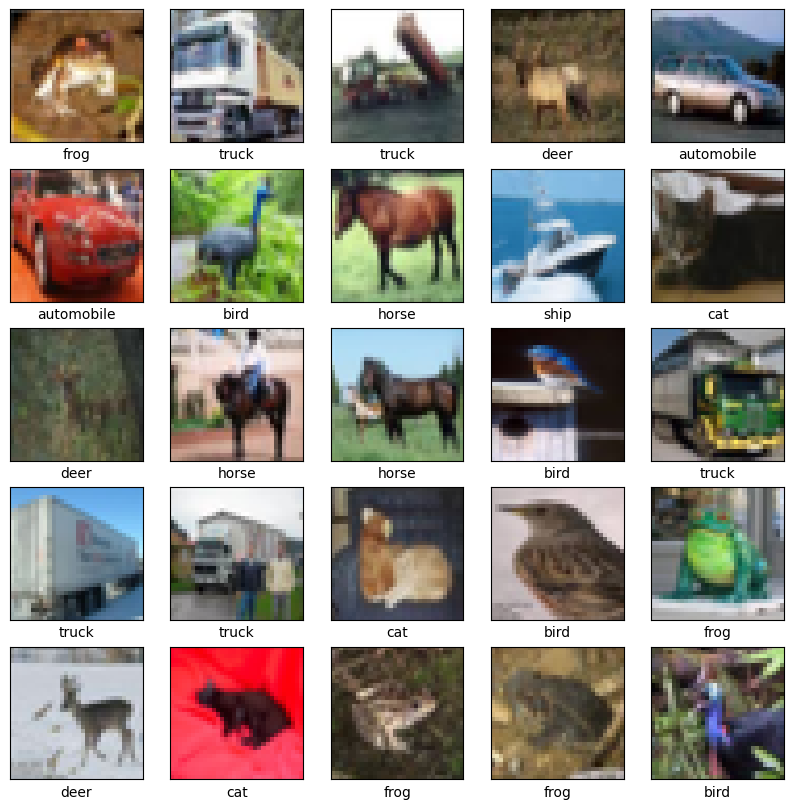

In [ ]:
vis_img(img_treino, labels_treino)

In [ ]:
#PRIMEIRA PARTE DA ARQUITETURA - FEATURE LEARNING

mold = models.Sequential()
#32 num de neuronios
#3x3 numero relu
#input_shape (pixes_linhas, pixels_coln, 3(colorida  RGB))
mold.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
#Polling de redução
mold.add(layers.MaxPooling2D((2,2)))

#A partir da segunda camada intermediaria não é necessário passar o input_shape
mold.add(layers.Conv2D(64,(3,3), activation = 'relu'))
mold.add(layers.MaxPooling2D((2,2)))

mold.add(layers.Conv2D(64,(3,3), activation = 'relu'))
mold.add(layers.MaxPooling2D((2,2)))

In [ ]:
#SEGUNDA PARTE DA ARQUITETURA - CLASSIFICATION

#realiza o achatamento
mold.add(layers.Flatten())
mold.add(layers.Dense(64, activation = 'relu'))
#Entrega as possibilidades - 10 classes
mold.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mold.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
#Compilação de qual mérica será avaliada no modelo
mold.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )

In [ ]:
#Treino do modelo
%%time
history = mold.fit(img_treino,
                   labels_treino,
                   epochs = 10,
                   validation_data = (img_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5774 - accuracy: 0.4212 - val_loss: 1.2837 - val_accuracy: 0.5395
Epoch 2/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.2250 - accuracy: 0.5618 - val_loss: 1.1596 - val_accuracy: 0.5815
Epoch 3/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.0870 - accuracy: 0.6154 - val_loss: 1.0756 - val_accuracy: 0.6170
Epoch 4/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9971 - accuracy: 0.6491 - val_loss: 1.0717 - val_accuracy: 0.6284
Epoch 5/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.9322 - accuracy: 0.6739 - val_loss: 1.0240 - val_accuracy: 0.6469
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8810 - accuracy: 0.6914 - val_loss: 0.9560 - val_accuracy: 0.6706
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.8334 - accuracy: 0.7088 - val_loss: 0.9

In [ ]:
#Avalia o modelo
erro_teste, acc_teste = mold.evaluate(img_teste, labels_teste, verbose = 2)
print("\nAcurácia dos dados de teste: ", acc_teste)

313/313 - 4s - loss: 0.8972 - accuracy: 0.6919 - 4s/epoch - 14ms/step

Acurácia dos dados de teste:  0.6919000148773193


In [48]:
from google.colab import files
uploaded = files.upload()

Saving nova_imagem.jpg to nova_imagem.jpg


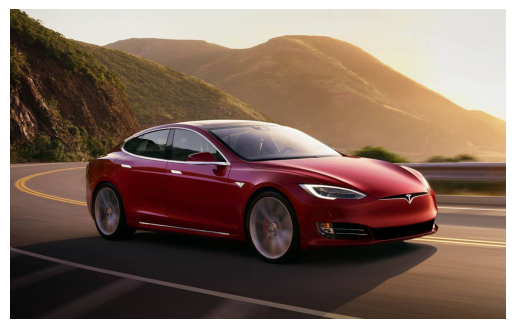

In [52]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'nova_imagem.jpg'
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

In [53]:
img.size

(1919, 1199)

In [54]:
largura = img.width
altura = img.height

In [55]:
altura

1199

In [56]:
largura

1919

In [57]:
#Alterando a resolução da imagem para a treinada no modelo
img = img.resize((32,32))

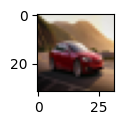

In [58]:
plt.figure(figsize = (1,1))
plt.imshow(img)
plt.show()

In [59]:
#Normalizar a imagem p/ 255
img_array = np.array(img) / 255.0

In [60]:
#Expande a dimensão do array, para que ele tenha o formato (1,32,32,3)
img_array = np.expand_dims(img_array, axis = 0)

In [61]:
prev = mold.predict(img_array)
prev

1/1 [==============================] - 0s 152ms/step


array([[1.2126409e-03, 9.8889416e-01, 7.2745126e-05, 6.6315399e-05,
        9.0006938e-07, 2.0812411e-05, 1.8155342e-04, 2.5458422e-07,
        8.1572067e-03, 1.3933412e-03]], dtype=float32)

In [66]:
class_prev = np.argmax(prev)
nome_class_prev = nome_class[class_prev]
prev

array([[1.2126409e-03, 9.8889416e-01, 7.2745126e-05, 6.6315399e-05,
        9.0006938e-07, 2.0812411e-05, 1.8155342e-04, 2.5458422e-07,
        8.1572067e-03, 1.3933412e-03]], dtype=float32)

In [63]:
print("A nova imagem foi classificada como:",nome_class_prev)

A nova imagem foi classificada como: automobile
